# Medical Insurance Cost Prediction

## Objective
- Predict Medical Insurance Cost for each citizen

## Metadata

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance (Target)

## Pipeline

1. Import Necessary libraries
2. Data Collection
3. Exploratory Data Analysis
4. Preprocessing
5. Splitting
6. Training and prediction
7. Validation
8. Evaluation

### Import Necessary libraries

In [6]:
# Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Data Collection

In [2]:
insurance = pd.read_csv('/mnt/d/Self_Study/DEPI/4-ML/datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [19]:
# number of rows and columns
insurance.shape

(1338, 7)

In [ ]:
insurance.info()
# 1338 entries(rows), 7 columns
# 4 Numerical Columns, 3 Object Columns
# Numerical Columns
# 1. age
# 2. bmi
# 3. children
# 4. charges
# Object Columns
# 1. sex
# 2. smoker
# 3. region


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check for missing values
insurance.isnull().sum()
# No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

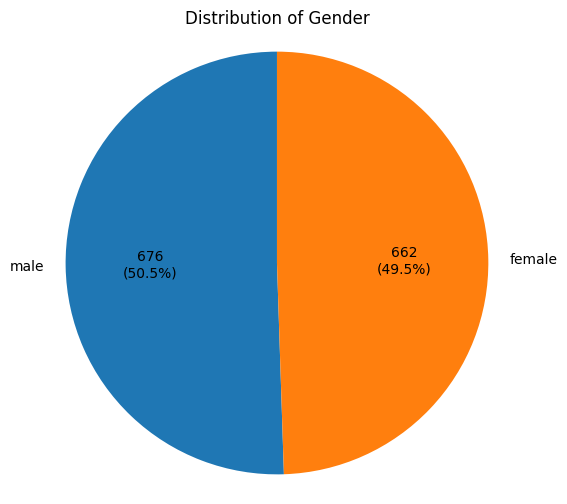

In [16]:
# Visualize Distribution of Gender piechart with count and percentage
fig = plt.figure(figsize=(6,6))
gender_counts = insurance['sex'].value_counts()
total = sum(gender_counts)

def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return '{:d}\n({:.1f}%)'.format(count, pct)
    return my_autopct

plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct=make_autopct(gender_counts),
    startangle=90
)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

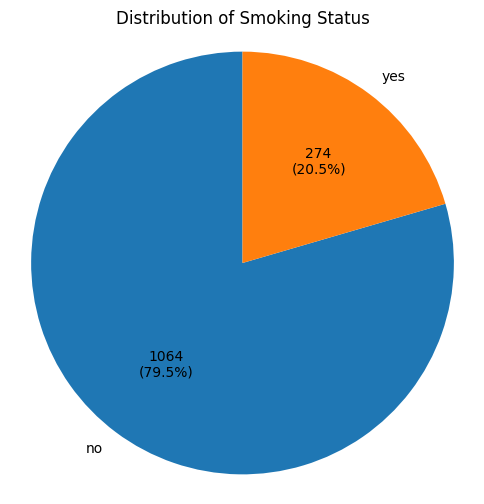

In [ ]:
# Visualize Distribution of smoking
fig = plt.figure(figsize=(6,6))
smoking_counts = insurance['smoker'].value_counts()
total = sum(smoking_counts)

def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return '{:d}\n({:.1f}%)'.format(count, pct)
    return my_autopct

plt.pie(
    smoking_counts, 
    labels=smoking_counts.index, 
    autopct=make_autopct(smoking_counts),
    startangle=90
)
plt.title('Distribution of Smoking Status')
plt.axis('equal')
plt.show()

In [18]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [20]:
# statistical Measures of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


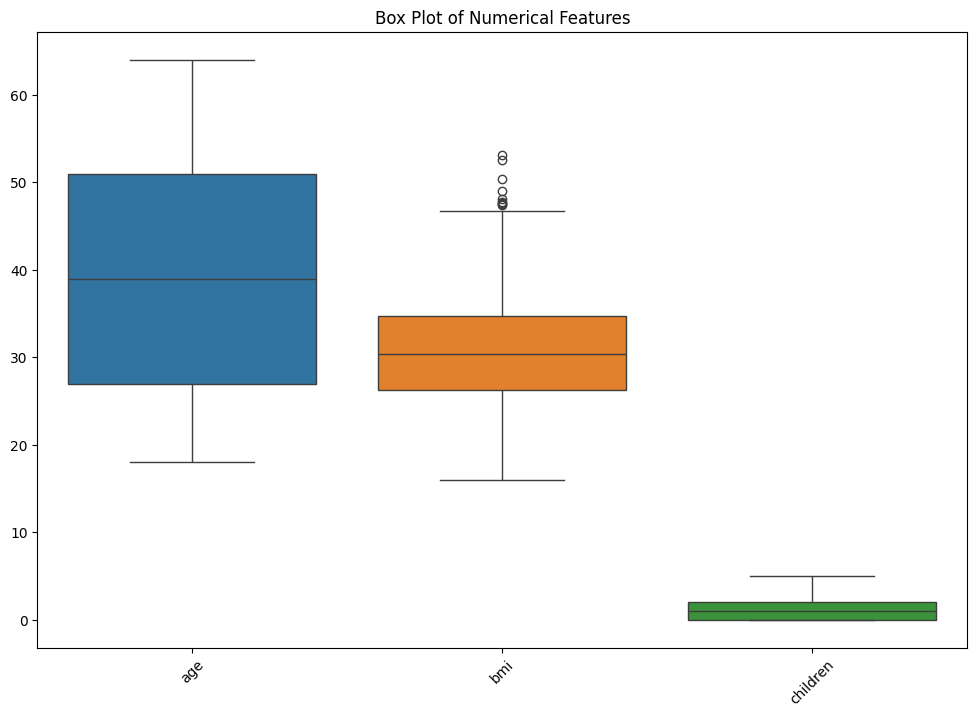

In [ ]:
# box plot for for all numerical features Except target variable(charges)
plt.figure(figsize=(12,8))
sns.boxplot(data=insurance.select_dtypes(include=['float64', 'int64']).drop(columns=['charges']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


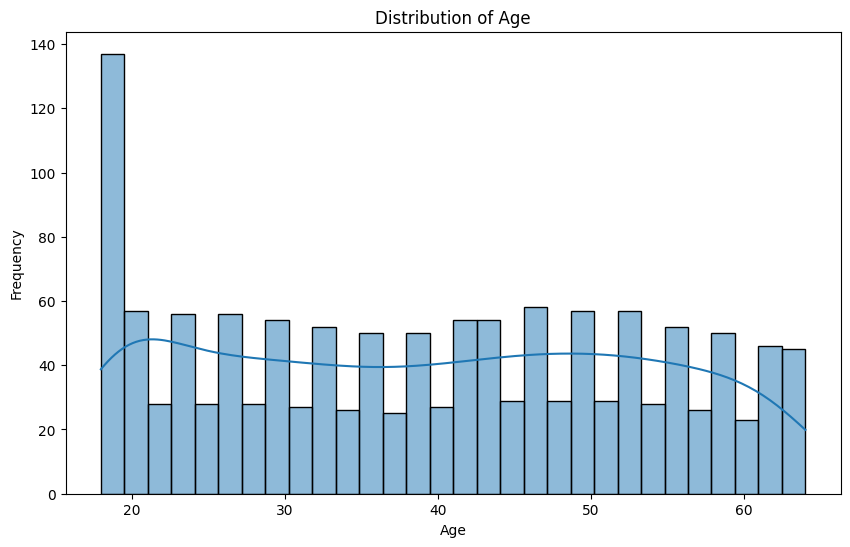

In [24]:
#distribution of age
plt.figure(figsize=(10,6))
sns.histplot(insurance['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

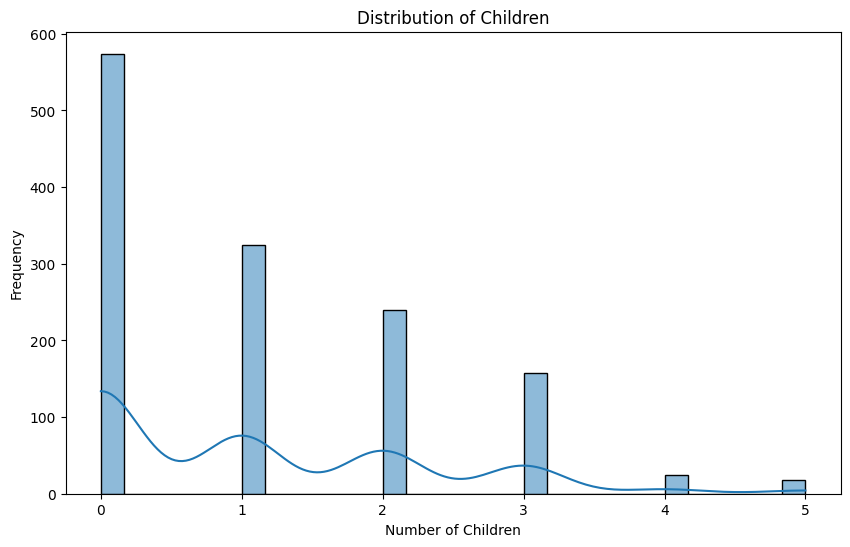

In [25]:
# Distribution of children
fig = plt.figure(figsize=(10,6))
sns.histplot(insurance['children'], bins=30, kde=True)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

In [28]:
#group people who have children with their insurance charges
children_insurance = insurance[insurance['children'] > 0].groupby('children')['charges'].mean().reset_index()
children_insurance


,children,charges
0,1,12731.171832
1,2,15073.563734
2,3,15355.318367
3,4,13850.656311
4,5,8786.035247


/tmp/ipykernel_17584/3621969568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=children_insurance,palette="tab10")


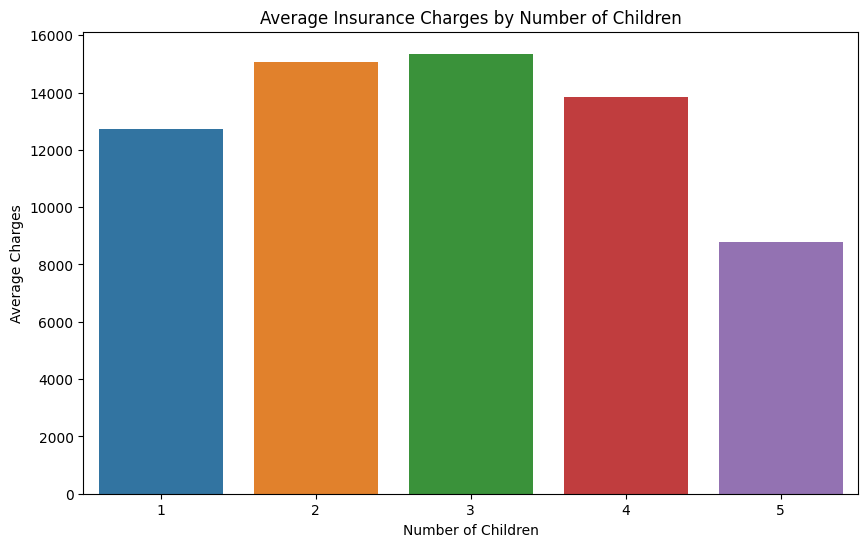

In [57]:
# visualize it
plt.figure(figsize=(10,6))
sns.barplot(x='children', y='charges', data=children_insurance,palette="tab10")
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [ ]:
# Group people who smoke and donot smoke with their insurance charges
smoking_insurance = insurance[insurance['smoker'] == 'yes'].groupby('smoker')['charges'].mean().reset_index()
non_smoking_insurance = insurance[insurance['smoker'] == 'no'].groupby('smoker')['charges'].mean().reset_index()
pd.DataFrame({'Smoking': smoking_insurance['charges'], 'Non-Smoking': non_smoking_insurance['charges']})




,Smoking,Non-Smoking
0,32050.231832,8434.268298


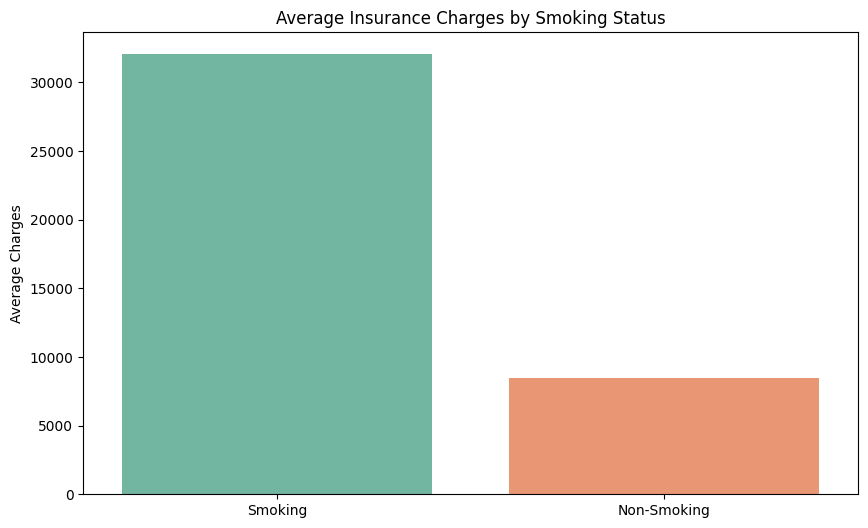

In [53]:
#visualize it
plt.figure(figsize=(10,6))
sns.barplot(data=pd.DataFrame({'Smoking': smoking_insurance['charges'], 'Non-Smoking': non_smoking_insurance['charges']}),palette="Set2")
plt.title('Average Insurance Charges by Smoking Status')
plt.ylabel('Average Charges')
plt.show()

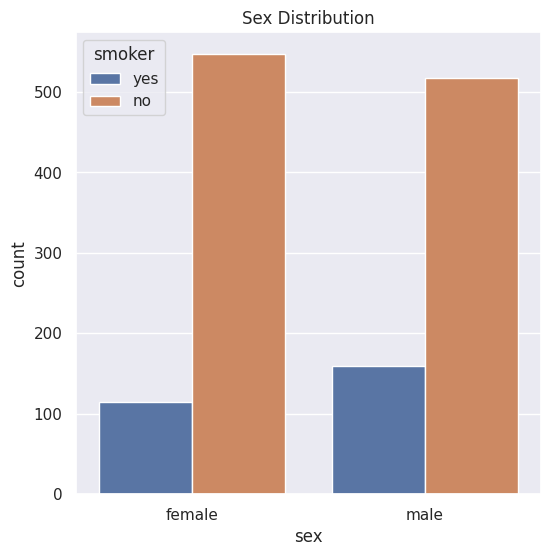

In [59]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance, hue='smoker')
plt.title('Sex Distribution')
plt.show()

In [48]:
#distribution of males and females who smoke and not by their charges (Rows: male and female), Columns(Smoke and non-smoking)
smoking_gender = insurance[insurance['smoker'] == 'yes'].groupby('sex')['charges'].mean().reset_index()
non_smoking_gender = insurance[insurance['smoker'] == 'no'].groupby('sex')['charges'].mean().reset_index()
pd.DataFrame({'Smoking': smoking_gender['charges'], 'Non-Smoking': non_smoking_gender['charges']})

,Smoking,Non-Smoking
0,30678.996276,8762.297300
1,33042.005975,8087.204731


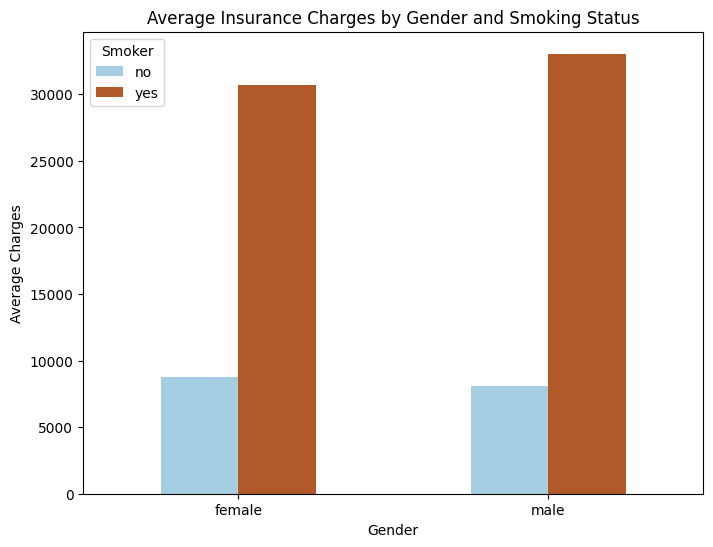

In [52]:
# Distribution of males and females who smoke and not by their charges (Rows: male and female, Columns: Smoke and non-smoking)
charges_by_gender_smoker = insurance.groupby(['sex', 'smoker'])['charges'].mean().unstack()

charges_by_gender_smoker.plot(kind='bar', figsize=(8,6),colormap="Paired")
plt.title('Average Insurance Charges by Gender and Smoking Status')
plt.ylabel('Average Charges')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Smoker')
plt.show()

/tmp/ipykernel_17584/3937158584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'region', data=insurance, palette='Set1')


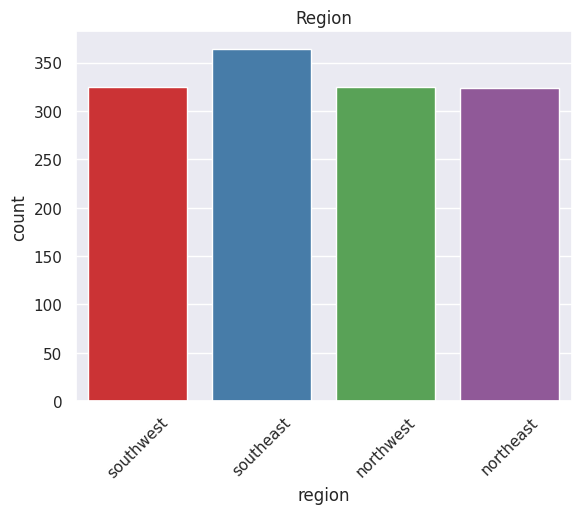

In [61]:
# Region column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'region', data=insurance, palette='Set1')
plt.title('Region')
plt.xticks(rotation=45)
plt.show()

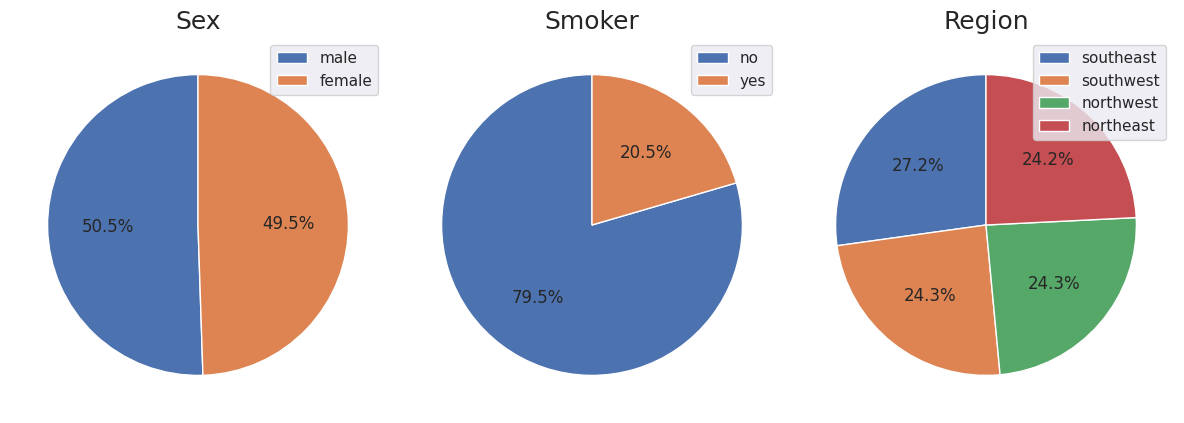

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

axs[0].pie((insurance['sex']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[0].set_title('Sex', fontsize = 18)
axs[0].legend(labels = insurance['sex'].value_counts().index, loc='upper right')

axs[1].pie((insurance['smoker']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[1].set_title('Smoker', fontsize = 18)
axs[1].legend(labels = insurance['smoker'].value_counts().index, loc='upper right')

axs[2].pie((insurance['region']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[2].set_title('Region', fontsize = 18)
axs[2].legend(labels = insurance['region'].value_counts().index, loc='upper right')

plt.tight_layout()
plt.show()

### Preprocessing

In [63]:
# Check Categorical & Numerical features
num_cols = insurance.iloc[:,:-1].select_dtypes(include= np.number).columns.tolist()

cat_cols = insurance.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns are: {num_cols}")
print(f"Categorical Columns are: {cat_cols}")

Numerical Columns are: ['age', 'bmi', 'children']
Categorical Columns are: ['sex', 'smoker', 'region']


In [67]:
# Check Duplicates
duplicates = insurance[insurance.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

#remove them
insurance = insurance.drop_duplicates()
print("successfully Duplicates removed")

Number of duplicate rows: 0
successfully Duplicates removed


In [68]:
#Encoding Categorical features
# Encoding sex column
insurance.replace({
    'sex':{
        'male':0,
        'female':1
    }}, inplace= True)

# Encoding smoker column
insurance.replace({
    'smoker':{
        'no':0,
        'yes':1
    }}, inplace= True)

# Encoding region column
insurance.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':2,
        'northeast':3
    }}, inplace= True)

insurance.head()

/tmp/ipykernel_17584/1744634649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({
/tmp/ipykernel_17584/1744634649.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({
/tmp/ipykernel_17584/1744634649.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


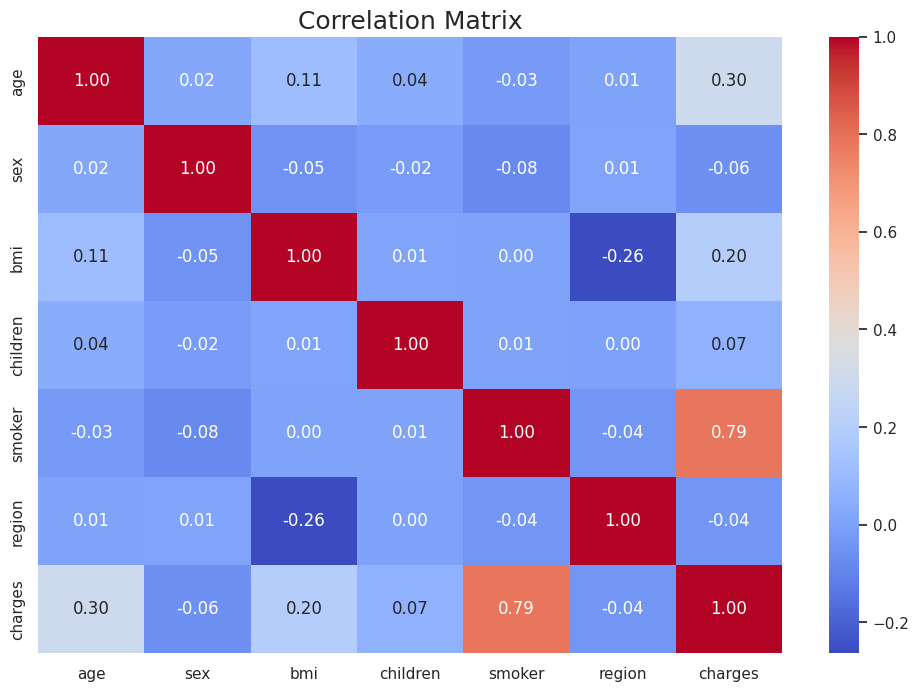

In [69]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(insurance.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [66]:
insurance.shape

(1337, 7)

### Splitting

In [70]:
X= insurance.drop(columns='charges', axis=1)
y= insurance['charges']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, x_train.shape, x_test.shape)

(1337, 6) (1069, 6) (268, 6)


### Training and Prediction

#### Linear Regression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# Prediction on training data
training_data_prediction = lin_reg.predict(x_train)

# R squared value
r2_train = metrics.r2_score( y_train, training_data_prediction)
mse_train = metrics.mean_squared_error(y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)


print(f"Linear Regression Modet:")
print(f"MSE Test: {mse_train:.2f}")
print(f"RMSE Test: {rmse_train:.2f}")
print(f"R2 Score Test: {r2_train:.4f}")

Linear Regression Modet:
MSE Test: 36982626.59
RMSE Test: 6081.33
R2 Score Test: 0.7299


### Validation

### Evaluation